In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
#import pickle
import seaborn as sns
from tqdm import notebook

In [2]:
df = pd.read_csv('Flats.csv', sep=',', encoding='utf-16')
df = df.drop('Unnamed: 0', axis=1)
df

,Количество комнат,Цена квартиры,Площадь,Район
0,1,2846000.0,27.10,Академический
1,1,2946000.0,27.10,Академический
2,1,3200000.0,30.80,Академический
3,1,3350000.0,35.45,Академический
4,1,3455000.0,34.95,Академический
...,...,...,...,...
370,3,9800000.0,108.10,Ленинский
371,3,10050000.0,108.28,Ленинский
372,4,10200000.0,114.30,Ленинский
373,4,10400000.0,114.30,Ленинский


In [3]:
def no_space(word):
    for i in range(len(word)):
        if word[i] == ' ':
            word = word[0:i:1] + '_' + word[i+1:len(word):1]
    return word

In [4]:
col = []
for name in df.columns:
    col.append(name.lower())
col

['количество комнат', 'цена квартиры', 'площадь', 'район']

In [5]:
col1 = []
for i in col:
    word = no_space(i)
    col1.append(word)
col1

['количество_комнат', 'цена_квартиры', 'площадь', 'район']

In [6]:
df = df.set_axis(col1, axis=1)
df

,количество_комнат,цена_квартиры,площадь,район
0,1,2846000.0,27.10,Академический
1,1,2946000.0,27.10,Академический
2,1,3200000.0,30.80,Академический
3,1,3350000.0,35.45,Академический
4,1,3455000.0,34.95,Академический
...,...,...,...,...
370,3,9800000.0,108.10,Ленинский
371,3,10050000.0,108.28,Ленинский
372,4,10200000.0,114.30,Ленинский
373,4,10400000.0,114.30,Ленинский


In [7]:
def low(string):
    return string.lower()
df['район'] = df['район'].apply(low)
df['район'].value_counts()

верх-исетский      122
чкаловский          84
железнодорожный     50
октябрьский         50
ленинский           41
академический       28
Name: район, dtype: int64

In [8]:
df.isna().sum()

количество_комнат    0
цена_квартиры        0
площадь              0
район                0
dtype: int64

Тест для случая, когда количество комнат количественный признак

In [9]:
df.loc[df['количество_комнат'] == 'Ст', 'количество_комнат'] = 0
df['количество_комнат'] = pd.to_numeric(df['количество_комнат'])

In [10]:
df1 = pd.get_dummies(df, drop_first=True)
df1['цена_квартиры'] = round(df1['цена_квартиры'] / 1000000, 2)
df1

,количество_комнат,цена_квартиры,площадь,район_верх-исетский,район_железнодорожный,район_ленинский,район_октябрьский,район_чкаловский
0,1,2.85,27.10,0,0,0,0,0
1,1,2.95,27.10,0,0,0,0,0
2,1,3.20,30.80,0,0,0,0,0
3,1,3.35,35.45,0,0,0,0,0
4,1,3.46,34.95,0,0,0,0,0
...,...,...,...,...,...,...,...,...
370,3,9.80,108.10,0,0,1,0,0
371,3,10.05,108.28,0,0,1,0,0
372,4,10.20,114.30,0,0,1,0,0
373,4,10.40,114.30,0,0,1,0,0


In [11]:
features = df1.drop('цена_квартиры', axis=1)
target = df1['цена_квартиры']


In [12]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=42
)

In [13]:
mse = make_scorer(mean_squared_error, greater_is_better=False)
mae = make_scorer(mean_absolute_error, greater_is_better=False)

Тест для логистической регрессии

Показатель среднеквадратичной стандартной ошибки для логистической регрессии

In [14]:
round(abs(cross_val_score(LinearRegression(), features, target, cv=3, scoring=mse).mean()), 2)

1.28

Показатель абсолютной стандартной ошибки для логистической регрессии

In [15]:
round(abs(cross_val_score(LinearRegression(), features, target, cv=3, scoring=mae).mean()), 2)

0.87

Тест для CatBoostRegressor

Показатель среднеквадратичной ошибки для CatBoostRegressor

In [16]:
round(abs(
    cross_val_score(CatBoostRegressor(random_state=42), features, target, cv=3, scoring=mse).mean()), 2)

Learning rate set to 0.032889
0:	learn: 2.2381259	total: 197ms	remaining: 3m 16s
1:	learn: 2.1791222	total: 201ms	remaining: 1m 40s
2:	learn: 2.1195904	total: 205ms	remaining: 1m 8s
3:	learn: 2.0637490	total: 208ms	remaining: 51.8s
4:	learn: 2.0253365	total: 210ms	remaining: 41.8s
5:	learn: 1.9725231	total: 214ms	remaining: 35.4s
6:	learn: 1.9192445	total: 220ms	remaining: 31.3s
7:	learn: 1.8683918	total: 224ms	remaining: 27.8s
8:	learn: 1.8214459	total: 227ms	remaining: 25s
9:	learn: 1.7750842	total: 231ms	remaining: 22.9s
10:	learn: 1.7308045	total: 235ms	remaining: 21.1s
11:	learn: 1.6849961	total: 238ms	remaining: 19.6s
12:	learn: 1.6433453	total: 242ms	remaining: 18.4s
13:	learn: 1.6043977	total: 244ms	remaining: 17.2s
14:	learn: 1.5648455	total: 246ms	remaining: 16.2s
15:	learn: 1.5256633	total: 251ms	remaining: 15.4s
16:	learn: 1.4896538	total: 254ms	remaining: 14.7s
17:	learn: 1.4520814	total: 258ms	remaining: 14.1s
18:	learn: 1.4154411	total: 263ms	remaining: 13.6s
19:	learn: 

1.75

Показатель абсолютной стандартной ошибки для CatBoostRegressor

In [17]:
round(abs(
    cross_val_score(CatBoostRegressor(random_state=42), features, target, cv=3, scoring=mae).mean()), 2)

Learning rate set to 0.032889
0:	learn: 2.2381259	total: 1.81ms	remaining: 1.81s
1:	learn: 2.1791222	total: 3.18ms	remaining: 1.59s
2:	learn: 2.1195904	total: 4.55ms	remaining: 1.51s
3:	learn: 2.0637490	total: 5.7ms	remaining: 1.42s
4:	learn: 2.0253365	total: 6.21ms	remaining: 1.24s
5:	learn: 1.9725231	total: 7.41ms	remaining: 1.23s
6:	learn: 1.9192445	total: 8.64ms	remaining: 1.23s
7:	learn: 1.8683918	total: 9.85ms	remaining: 1.22s
8:	learn: 1.8214459	total: 11.1ms	remaining: 1.22s
9:	learn: 1.7750842	total: 12.1ms	remaining: 1.2s
10:	learn: 1.7308045	total: 13.4ms	remaining: 1.2s
11:	learn: 1.6849961	total: 14.5ms	remaining: 1.19s
12:	learn: 1.6433453	total: 15.7ms	remaining: 1.19s
13:	learn: 1.6043977	total: 16.4ms	remaining: 1.16s
14:	learn: 1.5648455	total: 17.2ms	remaining: 1.13s
15:	learn: 1.5256633	total: 18.3ms	remaining: 1.13s
16:	learn: 1.4896538	total: 19.5ms	remaining: 1.13s
17:	learn: 1.4520814	total: 20.7ms	remaining: 1.13s
18:	learn: 1.4154411	total: 22ms	remaining: 1.1

0.95

Тест для модели случайный лес

In [18]:
reg = RandomForestRegressor(random_state=42)
parametres = {
    'n_estimators': range (10, 101, 10),
    'max_depth': range (1,13, 2)
}
grid = GridSearchCV(reg, parametres, cv=3, scoring=mse)
grid.fit(features, target)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': range(1, 13, 2),
                         'n_estimators': range(10, 101, 10)},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [19]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [20]:
round(abs(grid.best_score_), 2)

1.44

In [21]:
grid_mae = GridSearchCV(reg, parametres, cv=3, scoring=mae)
grid_mae.fit(features, target)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': range(1, 13, 2),
                         'n_estimators': range(10, 101, 10)},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [22]:
grid_mae.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [23]:
round(abs(grid_mae.best_score_), 2)

0.88

Итоговая таблица по моделям и показателям метрик

In [24]:
space = {
    'model':['LinearRegression', 'CatboostRegressor', 'RandomForestRegressor'],
    'mean_squared_error':[1.28, 1.75, 1.44],
    'mean_absolute_error':[0.87, 0.95, 0.88]
}
result_table = pd.DataFrame(data=space)
result_table

,model,mean_squared_error,mean_absolute_error
0,LinearRegression,1.28,0.87
1,CatboostRegressor,1.75,0.95
2,RandomForestRegressor,1.44,0.88


Тест для случая, когда количество комнат категориальный признак

In [25]:
df.dtypes

количество_комнат      int64
цена_квартиры        float64
площадь              float64
район                 object
dtype: object

In [26]:
df['количество_комнат'] = df['количество_комнат'].apply(str)
df

,количество_комнат,цена_квартиры,площадь,район
0,1,2846000.0,27.10,академический
1,1,2946000.0,27.10,академический
2,1,3200000.0,30.80,академический
3,1,3350000.0,35.45,академический
4,1,3455000.0,34.95,академический
...,...,...,...,...
370,3,9800000.0,108.10,ленинский
371,3,10050000.0,108.28,ленинский
372,4,10200000.0,114.30,ленинский
373,4,10400000.0,114.30,ленинский


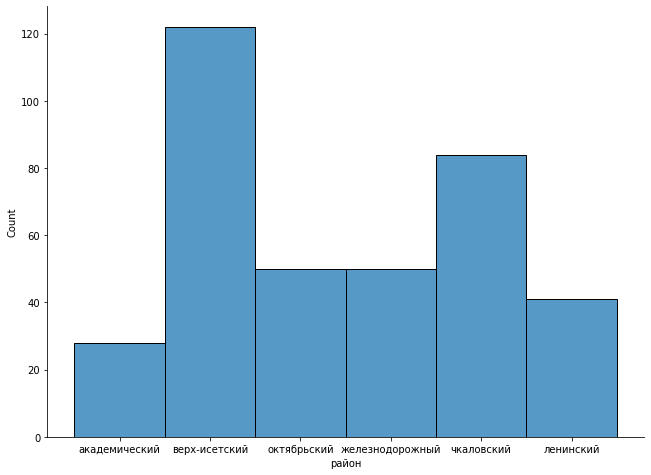

In [27]:
#Гистограмма распределения по районам
ra = sns.displot(df['район'])
ra.fig.set_size_inches(10, 7)

In [28]:
second_data = pd.get_dummies(df, drop_first=True)
second_data['цена_квартиры'] = round(second_data['цена_квартиры'] / 1000000, 2)
second_data

,цена_квартиры,площадь,количество_комнат_1,количество_комнат_2,количество_комнат_3,количество_комнат_4,район_верх-исетский,район_железнодорожный,район_ленинский,район_октябрьский,район_чкаловский
0,2.85,27.10,1,0,0,0,0,0,0,0,0
1,2.95,27.10,1,0,0,0,0,0,0,0,0
2,3.20,30.80,1,0,0,0,0,0,0,0,0
3,3.35,35.45,1,0,0,0,0,0,0,0,0
4,3.46,34.95,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
370,9.80,108.10,0,0,1,0,0,0,1,0,0
371,10.05,108.28,0,0,1,0,0,0,1,0,0
372,10.20,114.30,0,0,0,1,0,0,1,0,0
373,10.40,114.30,0,0,0,1,0,0,1,0,0


In [29]:
s_features = second_data.drop('цена_квартиры',axis=1)
s_target = second_data['цена_квартиры']

In [30]:
s_features_train, s_features_test, s_target_train, s_target_test = train_test_split(
    s_features, s_target, random_state=42, test_size=0.25
)

Тест для логистической регрессии

Показатель среднеквадратичной ошибки для логистической регресии

In [31]:
round(abs(cross_val_score(LinearRegression(), s_features, s_target, cv=3, scoring=mse).mean()), 2)

1.36

Показатель абсолютной стандартной ошибки для логистической регрессии

In [32]:
round(abs(cross_val_score(LinearRegression(), s_features, s_target, cv=3, scoring=mae).mean()), 2)

0.86

Тест для CatBoostRegressor

Показатель среднеквадратичной ошибки для CatBoostRegressor

In [33]:
round(abs(
    cross_val_score(CatBoostRegressor(random_state=42), s_features, s_target, cv=3, scoring=mse).mean()), 2)

Learning rate set to 0.032889
0:	learn: 2.2377728	total: 1.1ms	remaining: 1.09s
1:	learn: 2.1796713	total: 2.09ms	remaining: 1.04s
2:	learn: 2.1229002	total: 3.23ms	remaining: 1.07s
3:	learn: 2.0676832	total: 3.85ms	remaining: 960ms
4:	learn: 2.0178816	total: 4.57ms	remaining: 909ms
5:	learn: 1.9684406	total: 5.41ms	remaining: 896ms
6:	learn: 1.9169079	total: 6.49ms	remaining: 921ms
7:	learn: 1.8667915	total: 8.04ms	remaining: 996ms
8:	learn: 1.8176272	total: 9.41ms	remaining: 1.04s
9:	learn: 1.7712209	total: 10.9ms	remaining: 1.07s
10:	learn: 1.7245596	total: 12.2ms	remaining: 1.1s
11:	learn: 1.6816810	total: 13.4ms	remaining: 1.1s
12:	learn: 1.6396895	total: 14.5ms	remaining: 1.1s
13:	learn: 1.5978540	total: 15.7ms	remaining: 1.11s
14:	learn: 1.5559547	total: 16.8ms	remaining: 1.1s
15:	learn: 1.5187056	total: 17.9ms	remaining: 1.1s
16:	learn: 1.4800964	total: 19.1ms	remaining: 1.1s
17:	learn: 1.4529507	total: 19.8ms	remaining: 1.08s
18:	learn: 1.4173559	total: 20.9ms	remaining: 1.08s

1.76

Показатель абсолютной стандартной ошибки для CatBoostRegressor

In [34]:
round(abs(
    cross_val_score(CatBoostRegressor(random_state=42), s_features, s_target, cv=3, scoring=mae).mean()), 2)

Learning rate set to 0.032889
0:	learn: 2.2377728	total: 1.21ms	remaining: 1.21s
1:	learn: 2.1796713	total: 2.35ms	remaining: 1.17s
2:	learn: 2.1229002	total: 3.45ms	remaining: 1.15s
3:	learn: 2.0676832	total: 4.21ms	remaining: 1.05s
4:	learn: 2.0178816	total: 4.99ms	remaining: 992ms
5:	learn: 1.9684406	total: 5.89ms	remaining: 976ms
6:	learn: 1.9169079	total: 6.92ms	remaining: 982ms
7:	learn: 1.8667915	total: 7.92ms	remaining: 982ms
8:	learn: 1.8176272	total: 9.05ms	remaining: 997ms
9:	learn: 1.7712209	total: 10.1ms	remaining: 995ms
10:	learn: 1.7245596	total: 11.1ms	remaining: 996ms
11:	learn: 1.6816810	total: 12.1ms	remaining: 994ms
12:	learn: 1.6396895	total: 13.1ms	remaining: 994ms
13:	learn: 1.5978540	total: 14.3ms	remaining: 1.01s
14:	learn: 1.5559547	total: 15.3ms	remaining: 1.01s
15:	learn: 1.5187056	total: 16.6ms	remaining: 1.02s
16:	learn: 1.4800964	total: 17.7ms	remaining: 1.02s
17:	learn: 1.4529507	total: 18.5ms	remaining: 1.01s
18:	learn: 1.4173559	total: 19.7ms	remaining

0.96

Тест для модели случайный лес

In [35]:
s_reg = RandomForestRegressor(random_state=42)
parametres = {
    'n_estimators': range (10, 101, 10),
    'max_depth': range (1,13, 2)
}

s_grid_mse = GridSearchCV(s_reg, parametres, cv=3, scoring=mse)
s_grid_mse.fit(s_features, s_target)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': range(1, 13, 2),
                         'n_estimators': range(10, 101, 10)},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [36]:
s_grid_mse.best_params_

{'max_depth': 5, 'n_estimators': 10}

Показатель среднеквадратичной ошибки для модели случайный лес

In [37]:
round(abs(s_grid_mse.best_score_), 2)

1.41

In [38]:
s_grid_mae = GridSearchCV(s_reg, parametres, cv=3, scoring=mae)
s_grid_mae.fit(s_features, s_target)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': range(1, 13, 2),
                         'n_estimators': range(10, 101, 10)},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [39]:
s_grid_mae.best_params_

{'max_depth': 5, 'n_estimators': 10}

Показатель стандартной ошибки для модели случайный лес

In [40]:
round(abs(s_grid_mae.best_score_), 2)

0.88

Итоговая таблица для этого теста

In [41]:
s_space = {
    'model':['LinearRegression', 'CatboostRegressor', 'RandomForestRegressor'],
    'mean_squared_error':[1.36, 1.76, 1.41],
    'mean_absolute_error':[0.86, 0.96, 0.88]
}
s_result_table = pd.DataFrame(data=s_space)
s_result_table

,model,mean_squared_error,mean_absolute_error
0,LinearRegression,1.36,0.86
1,CatboostRegressor,1.76,0.96
2,RandomForestRegressor,1.41,0.88


Итоговая таблица по двум тестам

In [42]:
res_space = {
    'test': ['test1', 'test1', 'test1', 'test2', 'test2', 'test2'],
    'model':['LinearRegression', 'CatboostRegressor', 'RandomForestRegressor', 'LinearRegression', 'CatboostRegressor', 'RandomForestRegressor'],
    'mean_squared_error':[1.28, 1.75, 1.44, 1.36, 1.76, 1.41],
    'mean_absolute_error':[0.87, 0.95, 0.88, 0.86, 0.96, 0.88]
}
final = pd.DataFrame(data=res_space)

In [43]:
final.groupby(by=['model', 'test']).sum()

mean_squared_error  mean_absolute_error
model                 test                                          
CatboostRegressor     test1                1.75                 0.95
                      test2                1.76                 0.96
LinearRegression      test1                1.28                 0.87
                      test2                1.36                 0.86
RandomForestRegressor test1                1.44                 0.88
                      test2                1.41                 0.88

In [44]:
df['цена_квартиры'] = round(df['цена_квартиры'] / 1000000, 2)
df

,количество_комнат,цена_квартиры,площадь,район
0,1,2.85,27.10,академический
1,1,2.95,27.10,академический
2,1,3.20,30.80,академический
3,1,3.35,35.45,академический
4,1,3.46,34.95,академический
...,...,...,...,...
370,3,9.80,108.10,ленинский
371,3,10.05,108.28,ленинский
372,4,10.20,114.30,ленинский
373,4,10.40,114.30,ленинский


Тест с категориями жилья

In [45]:
third_table = df.copy()

<AxesSubplot:ylabel='Frequency'>

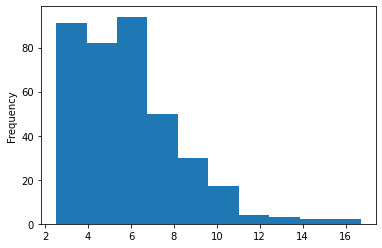

In [46]:
third_table['цена_квартиры'].plot(kind='hist', bins=10)

In [47]:
def premium(value):
    if value < 6:
        res = 'дешевая'
    elif value < 8:
        res = 'средняя'
    else:
        res = 'премиальная'
    return res

In [48]:
third_table['категория'] = third_table['цена_квартиры'].apply(premium)
third_table['количество_комнат'] = pd.to_numeric(third_table['количество_комнат'])
third_table

,количество_комнат,цена_квартиры,площадь,район,категория
0,1,2.85,27.10,академический,дешевая
1,1,2.95,27.10,академический,дешевая
2,1,3.20,30.80,академический,дешевая
3,1,3.35,35.45,академический,дешевая
4,1,3.46,34.95,академический,дешевая
...,...,...,...,...,...
370,3,9.80,108.10,ленинский,премиальная
371,3,10.05,108.28,ленинский,премиальная
372,4,10.20,114.30,ленинский,премиальная
373,4,10.40,114.30,ленинский,премиальная


In [49]:
third_table['категория'].value_counts()

дешевая        222
средняя         86
премиальная     67
Name: категория, dtype: int64

In [50]:
third_table_dummy = pd.get_dummies(third_table, drop_first=True)
third_features = third_table_dummy.drop('цена_квартиры', axis=1)
third_target = third_table_dummy['цена_квартиры']

Тест для линейной регрессии

Показатель среднеквадратичной ошибки для линейной регресии

In [51]:
round(abs(cross_val_score(LinearRegression(), third_features, third_target, cv=3, scoring=mse).mean()), 2)

1.0

Показатель стандартной абсолютной ошибки для линейной регресии

In [52]:
round(abs(cross_val_score(LinearRegression(), third_features, third_target, cv=3, scoring=mae).mean()), 2)

0.74

Тест для CatBoostRegressor

 Показатель среднеквадратичной ошибки для CatBoostRegressor

In [53]:
round(abs(cross_val_score(CatBoostRegressor(), third_features, third_target, cv=3, scoring=mse).mean()), 2)

Learning rate set to 0.032889
0:	learn: 2.2341311	total: 1.34ms	remaining: 1.34s
1:	learn: 2.1766328	total: 2.16ms	remaining: 1.08s
2:	learn: 2.1182201	total: 3.13ms	remaining: 1.04s
3:	learn: 2.0607067	total: 4.42ms	remaining: 1.1s
4:	learn: 2.0063077	total: 5.19ms	remaining: 1.03s
5:	learn: 1.9570150	total: 6.46ms	remaining: 1.07s
6:	learn: 1.9028673	total: 7.37ms	remaining: 1.04s
7:	learn: 1.8510532	total: 8.61ms	remaining: 1.07s
8:	learn: 1.8030574	total: 9.54ms	remaining: 1.05s
9:	learn: 1.7547069	total: 11ms	remaining: 1.09s
10:	learn: 1.7086146	total: 12.2ms	remaining: 1.1s
11:	learn: 1.6651265	total: 13ms	remaining: 1.07s
12:	learn: 1.6268755	total: 13.9ms	remaining: 1.05s
13:	learn: 1.5838361	total: 15.2ms	remaining: 1.07s
14:	learn: 1.5419650	total: 16.5ms	remaining: 1.08s
15:	learn: 1.5026960	total: 17.8ms	remaining: 1.09s
16:	learn: 1.4634500	total: 19.1ms	remaining: 1.1s
17:	learn: 1.4246539	total: 20.4ms	remaining: 1.11s
18:	learn: 1.3877975	total: 21.6ms	remaining: 1.11s

1.3

Показатель стандартной абсолютной ошибки для CatBoostRegressor

In [54]:
round(abs(cross_val_score(CatBoostRegressor(), third_features, third_target, cv=3, scoring=mae).mean()), 2)

Learning rate set to 0.032889
0:	learn: 2.2341311	total: 1.54ms	remaining: 1.54s
1:	learn: 2.1766328	total: 2.2ms	remaining: 1.1s
2:	learn: 2.1182201	total: 3.26ms	remaining: 1.08s
3:	learn: 2.0607067	total: 4.52ms	remaining: 1.13s
4:	learn: 2.0063077	total: 5.22ms	remaining: 1.04s
5:	learn: 1.9570150	total: 6.44ms	remaining: 1.07s
6:	learn: 1.9028673	total: 7.47ms	remaining: 1.06s
7:	learn: 1.8510532	total: 8.88ms	remaining: 1.1s
8:	learn: 1.8030574	total: 9.9ms	remaining: 1.09s
9:	learn: 1.7547069	total: 11.3ms	remaining: 1.11s
10:	learn: 1.7086146	total: 12.5ms	remaining: 1.12s
11:	learn: 1.6651265	total: 13.4ms	remaining: 1.1s
12:	learn: 1.6268755	total: 14.3ms	remaining: 1.09s
13:	learn: 1.5838361	total: 15.5ms	remaining: 1.09s
14:	learn: 1.5419650	total: 16.7ms	remaining: 1.09s
15:	learn: 1.5026960	total: 17.8ms	remaining: 1.09s
16:	learn: 1.4634500	total: 18.9ms	remaining: 1.09s
17:	learn: 1.4246539	total: 20.1ms	remaining: 1.09s
18:	learn: 1.3877975	total: 21.2ms	remaining: 1.1

0.86

Тест для RandomForestRegressor

In [55]:
th_reg = RandomForestRegressor(random_state=42)
parametres = {
    'n_estimators': range (10, 101, 10),
    'max_depth': range (1,13, 2)
}

th_grid_mse = GridSearchCV(th_reg, parametres, cv=3, scoring=mse)
th_grid_mse.fit(third_features, third_target)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': range(1, 13, 2),
                         'n_estimators': range(10, 101, 10)},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [56]:
th_grid_mse.best_params_

{'max_depth': 5, 'n_estimators': 40}

Показатель среднеквадратичной ошибки для RandomForestRegressor

In [57]:
round(abs(th_grid_mse.best_score_),2)

1.45

In [58]:
th_grid_mae = GridSearchCV(th_reg, parametres, cv=3, scoring=mae)
th_grid_mae.fit(third_features, third_target)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': range(1, 13, 2),
                         'n_estimators': range(10, 101, 10)},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [59]:
th_grid_mae.best_params_

{'max_depth': 5, 'n_estimators': 30}

Показатель стандартной абсолютной ошибки для RandomForestRegressor

In [60]:
round(abs(th_grid_mae.best_score_),2)

0.9

In [61]:
result_space = {
    'test': ['test1', 'test1', 'test1', 'test2', 'test2', 'test2', 'test3', 'test3','test3'],
    'model':['LinearRegression', 'CatboostRegressor', 'RandomForestRegressor', 'LinearRegression', 'CatboostRegressor', 'RandomForestRegressor', 'LinearRegression', 'CatboostRegressor', 'RandomForestRegressor'],
    'mean_squared_error':[1.28, 1.75, 1.44, 1.36, 1.76, 1.41, 1.00, 1.30, 1.45],
    'mean_absolute_error':[0.87, 0.95, 0.88, 0.86, 0.96, 0.88, 0.74, 0.86, 0.90]
}
finali = pd.DataFrame(data=result_space)
finali

,test,model,mean_squared_error,mean_absolute_error
0,test1,LinearRegression,1.28,0.87
1,test1,CatboostRegressor,1.75,0.95
2,test1,RandomForestRegressor,1.44,0.88
3,test2,LinearRegression,1.36,0.86
4,test2,CatboostRegressor,1.76,0.96
5,test2,RandomForestRegressor,1.41,0.88
6,test3,LinearRegression,1.00,0.74
7,test3,CatboostRegressor,1.30,0.86
8,test3,RandomForestRegressor,1.45,0.90


Итоговая таблица про трем тестам

In [62]:
finali.groupby(by=['model', 'test']).sum()

mean_squared_error  mean_absolute_error
model                 test                                          
CatboostRegressor     test1                1.75                 0.95
                      test2                1.76                 0.96
                      test3                1.30                 0.86
LinearRegression      test1                1.28                 0.87
                      test2                1.36                 0.86
                      test3                1.00                 0.74
RandomForestRegressor test1                1.44                 0.88
                      test2                1.41                 0.88
                      test3                1.45                 0.90

Тест для линейной регрессии по категориям квартиры(степеням премиальности)

In [63]:
df['количество_комнат'] = pd.to_numeric(df['количество_комнат'])
test4_table = df.copy()
test4_table['категория'] = third_table['категория']
test4_table = pd.get_dummies(test4_table, drop_first=True)
test4_table

,количество_комнат,цена_квартиры,площадь,район_верх-исетский,район_железнодорожный,район_ленинский,район_октябрьский,район_чкаловский,категория_премиальная,категория_средняя
0,1,2.85,27.10,0,0,0,0,0,0,0
1,1,2.95,27.10,0,0,0,0,0,0,0
2,1,3.20,30.80,0,0,0,0,0,0,0
3,1,3.35,35.45,0,0,0,0,0,0,0
4,1,3.46,34.95,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
370,3,9.80,108.10,0,0,1,0,0,1,0
371,3,10.05,108.28,0,0,1,0,0,1,0
372,4,10.20,114.30,0,0,1,0,0,1,0
373,4,10.40,114.30,0,0,1,0,0,1,0


In [64]:
test4_features = test4_table.drop('цена_квартиры', axis=1)
test4_target = test4_table['цена_квартиры']

In [65]:
test4_features_train, test4_features_test, test4_target_train, test4_target_test =  train_test_split(
    test4_features,test4_target, test_size=0.2, random_state=42)

Проверка на то, все ли категории включает в себя обучающая выборка

In [66]:
sh = ['категория_премиальная', 'категория_средняя']
su = 0
for name in sh:
    val = test4_features_train[name].sum()
    su+=val
    print(name+':', 'количество квартир -', val)
print('категория_дешевая: количество-квартир - ', len(test4_target_train) - su)

категория_премиальная: количество квартир - 51
категория_средняя: количество квартир - 70
категория_дешевая: количество-квартир -  179


Сравнение с числом всех квартир соотвествующей категории

In [67]:
third_table['категория'].value_counts()

дешевая        222
средняя         86
премиальная     67
Name: категория, dtype: int64

Проверка для дешевых квартир

In [68]:
expensive_features = test4_features.loc[test4_features['категория_премиальная'] == 1]
expensive_target = test4_target[expensive_features.index]

In [69]:
def partition(model, features_test, target_test, metric):
    state = np.random.RandomState(42)
    scores = []
    for i in notebook.tqdm(range(0, 1000)):
        target_subsample = target_test.sample(frac=10/len(target_test), replace=True, random_state=state)
        features_subsample = features_test.loc[target_subsample.index]
        pred = model.predict(features_subsample)
        sc = metric(target_subsample, pred)
        scores.append(sc)
    return pd.Series(scores)

In [70]:
def bootstrap(scores):
    state = np.random.RandomState(42)
    means = []
    for i in notebook.tqdm(range(1000)):
        subsample = scores.sample(frac=200/len(scores), replace=True, random_state=state)
        mn = subsample.mean()
        means.append(mn)
    return pd.Series(means)

In [71]:
model4 = LinearRegression()
model4.fit(test4_features_train, test4_target_train)

LinearRegression()

In [72]:
mse_expensive = partition(model4, expensive_features, expensive_target, mean_squared_error)
means_mse_expensive = bootstrap(mse_expensive)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

График распределения показателей метрики mse для премиальных квартир

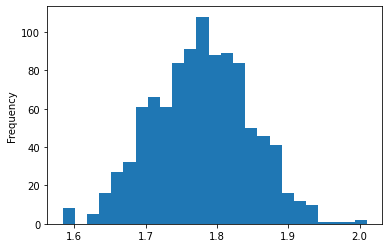

In [73]:
ax1_mse = means_mse_expensive.plot(kind='hist', bins=25)

Среднее значение показателя метрики mse для премиальных квартрир

In [74]:
round(means_mse_expensive.mean(), 2)

1.78

In [75]:
mae_expensive = partition(model4, expensive_features, expensive_target, mean_absolute_error)
means_mae_expensive = bootstrap(mae_expensive)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

График распределения показателей метрики mae для премиальных квартир

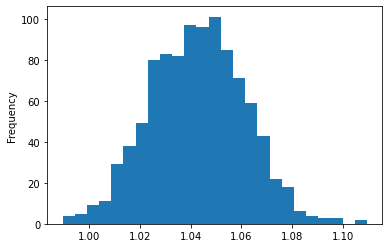

In [76]:
ax1_mae = means_mae_expensive.plot(kind='hist', bins=25)

Среднее значение mae для премиальных квартир

In [77]:
round(means_mae_expensive.mean(),2)

1.04

Исследование показателей для средних квартир

In [78]:
middle_features = test4_features.loc[test4_features['категория_средняя'] == 1]
middle_target = test4_target[middle_features.index]

In [79]:
mse_middle = partition(model4, middle_features, middle_target, mean_squared_error)
means_mse_middle= bootstrap(mse_middle)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Распределение показателей метрики mse для средних квартир

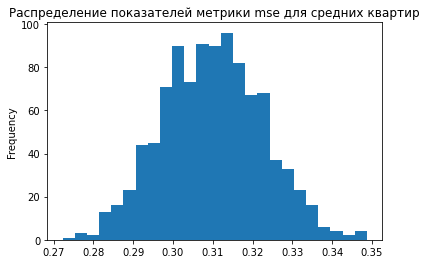

In [80]:
ax2_mae = means_mse_middle.plot(kind='hist', bins=25, title='Распределение показателей метрики mse для средних квартир')

Среднее значение метрики mse для средних квартир

In [81]:
round(means_mse_middle.mean(),2)

0.31

In [82]:
mae_middle = partition(model4, middle_features, middle_target, mean_absolute_error)
means_mae_middle = bootstrap(mae_middle)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Распределение показателей метрики mae для средних квартир

<AxesSubplot:title={'center':'Распределение показателей метрики mae для средних квартир'}, ylabel='Frequency'>

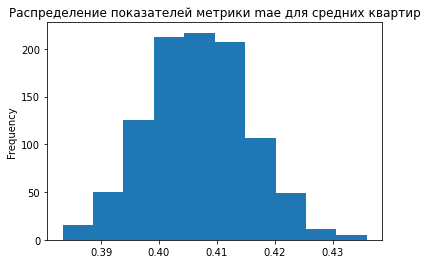

In [83]:
means_mae_middle.plot(kind='hist', bins=10, title='Распределение показателей метрики mae для средних квартир')

Средний показатель метрики mae для средних квартир

In [84]:
round(means_mae_middle.mean(),2)

0.41

Тест для дешевых квартир

In [85]:
poor_features = test4_features.loc[(test4_features['категория_премиальная'] == 0) & (test4_features['категория_средняя'] == 0)]
poor_target = test4_target.loc[poor_features.index]

In [86]:
mse_poor = partition(model4, poor_features, poor_target, mean_squared_error)
means_mse_poor = bootstrap(mse_poor)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Распределение показателей метрики mse для дешевых квартир

<AxesSubplot:ylabel='Frequency'>

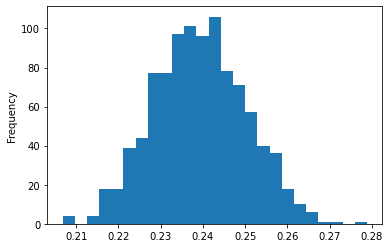

In [87]:
means_mse_poor.plot(kind='hist', bins=25)

Средний показатель метрики mse для дешевых квартир

In [88]:
round(means_mse_poor.mean(),2)

0.24

In [89]:
mae_poor = partition(model4, poor_features, poor_target, mean_absolute_error)
means_mae_poor = bootstrap(mae_poor)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Распределение показателей метрики mae для дешевых квартир

<AxesSubplot:ylabel='Frequency'>

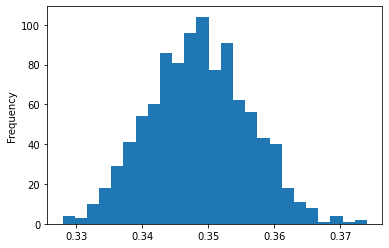

In [90]:
means_mae_poor.plot(kind='hist', bins=25)

Средний показатель метрики mae для дешевых квартир

In [91]:
round(means_mae_poor.mean(),2)

0.35

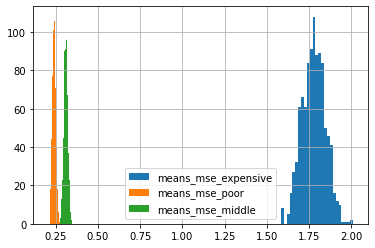

In [92]:
result_list_mse = [means_mse_expensive, means_mse_poor, means_mse_middle]
result_list_mse_str = ['means_mse_expensive', 'means_mse_poor', 'means_mse_middle']
for i in [0, 1, 2]:
    result_list_mse[i].hist(bins=25)
plt.legend(result_list_mse_str)

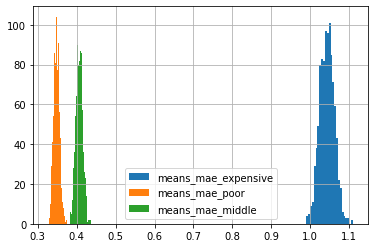

In [93]:
result_list_mae = [means_mae_expensive, means_mae_poor, means_mae_middle]
result_list_mse_str = ['means_mae_expensive', 'means_mae_poor', 'means_mae_middle']
for i in [0, 1, 2]:
    result_list_mae[i].hist(bins=25)
plt.legend(result_list_mse_str)

Вывод:

Тест с введением нового признака для линейной регрессии

In [94]:
test5 = df.copy()
test5['категория'] = third_table['категория']
test5 = pd.get_dummies(test5, drop_first=True)

In [95]:
test5.loc[test5['количество_комнат'] == 0, 'количество_комнат'] = 0.5
test5['area_per_room'] = pd.to_numeric(test5['площадь'] / test5['количество_комнат'])

In [96]:
test5['area_per_room'].isna().sum()

0

In [97]:
test5_features = test5.drop('цена_квартиры', axis=1)
test5_target = test5['цена_квартиры']

Показатели метрики mse

In [98]:
round(abs(cross_val_score(LinearRegression(), test5_features, test5_target, cv=3, scoring=mse).mean()),2)

1.01

Показатели метрики mae

In [99]:
round(abs(cross_val_score(LinearRegression(), test5_features, test5_target, cv=3, scoring=mae).mean()),2)

0.73

Проверка на корелляцию нового признака с теми, из которых он сформирован

In [100]:
print('Корелляция с количеством комнат', round(test5['area_per_room'].corr(test5['количество_комнат']),2))
print('Корелляция с площадью', round(test5['area_per_room'].corr(test5['площадь']),2))

Корелляция с количеством комнат -0.76
Корелляция с площадью -0.53


Визуализация

<AxesSubplot:xlabel='количество_комнат', ylabel='area_per_room'>

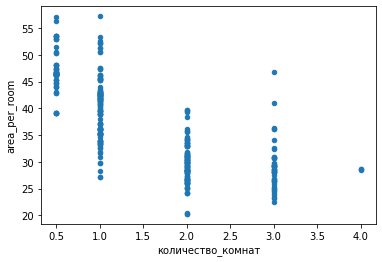

In [101]:
test5.plot(x='количество_комнат', y='area_per_room', kind='scatter')

<AxesSubplot:xlabel='площадь', ylabel='area_per_room'>

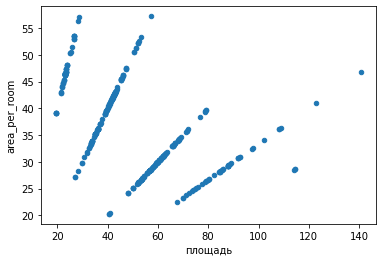

In [102]:
test5.plot(x='площадь', y='area_per_room', kind='scatter')

Введение нового признака не повлияло в связи с высокой корелляцией этого признака с теми, из которых он сформирован

Тест с категориальными признаками CatBoostRegressor

In [103]:
testik = third_table.copy()
testik

,количество_комнат,цена_квартиры,площадь,район,категория
0,1,2.85,27.10,академический,дешевая
1,1,2.95,27.10,академический,дешевая
2,1,3.20,30.80,академический,дешевая
3,1,3.35,35.45,академический,дешевая
4,1,3.46,34.95,академический,дешевая
...,...,...,...,...,...
370,3,9.80,108.10,ленинский,премиальная
371,3,10.05,108.28,ленинский,премиальная
372,4,10.20,114.30,ленинский,премиальная
373,4,10.40,114.30,ленинский,премиальная


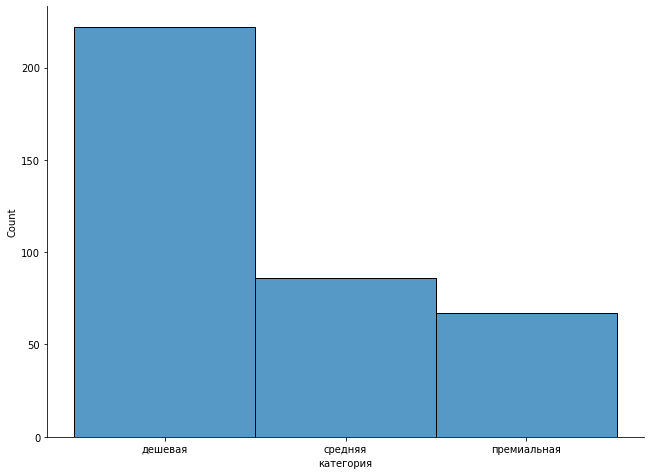

In [104]:
third_hist = sns.displot(testik['категория'])
third_hist.fig.set_size_inches(10, 7)

In [105]:
testik_features = testik.drop('цена_квартиры', axis=1)
testik_target = testik['цена_квартиры']
cat_features = ['район', 'категория']

In [106]:
round(abs(cross_val_score(CatBoostRegressor(random_state=12345), testik_features, testik_target, cv=3, scoring=mse,
                    fit_params={'cat_features':cat_features}).mean()), 2)

Learning rate set to 0.032889
0:	learn: 2.2419934	total: 89.6ms	remaining: 1m 29s
1:	learn: 2.1937156	total: 186ms	remaining: 1m 33s
2:	learn: 2.1402449	total: 289ms	remaining: 1m 36s
3:	learn: 2.0867492	total: 398ms	remaining: 1m 39s
4:	learn: 2.0353190	total: 503ms	remaining: 1m 40s
5:	learn: 1.9845586	total: 600ms	remaining: 1m 39s
6:	learn: 1.9331515	total: 694ms	remaining: 1m 38s
7:	learn: 1.8855539	total: 794ms	remaining: 1m 38s
8:	learn: 1.8405536	total: 891ms	remaining: 1m 38s
9:	learn: 1.7954114	total: 982ms	remaining: 1m 37s
10:	learn: 1.7554296	total: 1.11s	remaining: 1m 39s
11:	learn: 1.7143946	total: 1.21s	remaining: 1m 39s
12:	learn: 1.6722054	total: 1.31s	remaining: 1m 39s
13:	learn: 1.6322612	total: 1.4s	remaining: 1m 38s
14:	learn: 1.5933461	total: 1.49s	remaining: 1m 38s
15:	learn: 1.5559092	total: 1.59s	remaining: 1m 37s
16:	learn: 1.5217971	total: 1.7s	remaining: 1m 38s
17:	learn: 1.4911623	total: 1.8s	remaining: 1m 38s
18:	learn: 1.4593056	total: 1.91s	remaining: 1

1.07

In [107]:
val = round(abs(cross_val_score(CatBoostRegressor(random_state=12345), testik_features, testik_target, cv=3, scoring=mae,
                                fit_params={'cat_features':cat_features}).mean()), 2)
print('Показатель метрики mae для CatBoostRegressor с категориальными признаками', val)

Learning rate set to 0.032889
0:	learn: 2.2419934	total: 114ms	remaining: 1m 53s
1:	learn: 2.1937156	total: 249ms	remaining: 2m 4s
2:	learn: 2.1402449	total: 383ms	remaining: 2m 7s
3:	learn: 2.0867492	total: 478ms	remaining: 1m 59s
4:	learn: 2.0353190	total: 576ms	remaining: 1m 54s
5:	learn: 1.9845586	total: 722ms	remaining: 1m 59s
6:	learn: 1.9331515	total: 845ms	remaining: 1m 59s
7:	learn: 1.8855539	total: 986ms	remaining: 2m 2s
8:	learn: 1.8405536	total: 1.09s	remaining: 2m
9:	learn: 1.7954114	total: 1.2s	remaining: 1m 58s
10:	learn: 1.7554296	total: 1.32s	remaining: 1m 58s
11:	learn: 1.7143946	total: 1.4s	remaining: 1m 55s
12:	learn: 1.6722054	total: 1.51s	remaining: 1m 54s
13:	learn: 1.6322612	total: 1.61s	remaining: 1m 53s
14:	learn: 1.5933461	total: 1.74s	remaining: 1m 54s
15:	learn: 1.5559092	total: 1.84s	remaining: 1m 53s
16:	learn: 1.5217971	total: 1.94s	remaining: 1m 52s
17:	learn: 1.4911623	total: 2.05s	remaining: 1m 51s
18:	learn: 1.4593056	total: 2.19s	remaining: 1m 52s
1

Обработка новых данных

In [108]:
big_table = pd.read_csv('New_Flats.csv').drop('Unnamed: 0', axis=1)
big_table

,Количество комнат,Цена квартиры,Площадь,Район
0,1,2846000,27.10,Академический
1,1,2946000,27.10,Академический
2,1,3200000,30.80,Академический
3,1,3350000,35.45,Академический
4,1,3455000,34.95,Академический
...,...,...,...,...
699,3,10000000,108.76,Ленинский
700,3,10300000,108.10,Ленинский
701,3,10500000,108.28,Ленинский
702,4,10600000,114.30,Ленинский


Предобработка

In [109]:
new_names = []
for i in range(len(big_table.columns)):
    new_names.append(no_space(big_table.columns[i].lower()))
new_names

['количество_комнат', 'цена_квартиры', 'площадь', 'район']

In [110]:
big_table.set_axis(new_names,axis=1, inplace=True)
big_table

,количество_комнат,цена_квартиры,площадь,район
0,1,2846000,27.10,Академический
1,1,2946000,27.10,Академический
2,1,3200000,30.80,Академический
3,1,3350000,35.45,Академический
4,1,3455000,34.95,Академический
...,...,...,...,...
699,3,10000000,108.76,Ленинский
700,3,10300000,108.10,Ленинский
701,3,10500000,108.28,Ленинский
702,4,10600000,114.30,Ленинский


In [111]:
big_table['район'] = big_table['район'].apply(low)
big_table.head(10)

,количество_комнат,цена_квартиры,площадь,район
0,1,2846000,27.10,академический
1,1,2946000,27.10,академический
2,1,3200000,30.80,академический
3,1,3350000,35.45,академический
4,1,3455000,34.95,академический
5,1,3676000,37.25,академический
6,1,3790000,40.85,академический
7,1,3820000,41.15,академический
8,1,3910000,42.00,академический
9,1,3945000,42.50,академический


In [112]:
big_table['цена_квартиры'] = round(big_table['цена_квартиры'] / 10**6, 2)
big_table

,количество_комнат,цена_квартиры,площадь,район
0,1,2.85,27.10,академический
1,1,2.95,27.10,академический
2,1,3.20,30.80,академический
3,1,3.35,35.45,академический
4,1,3.46,34.95,академический
...,...,...,...,...
699,3,10.00,108.76,ленинский
700,3,10.30,108.10,ленинский
701,3,10.50,108.28,ленинский
702,4,10.60,114.30,ленинский


Проверка на пустые значения

In [113]:
big_table.isna().sum()

количество_комнат    0
цена_квартиры        0
площадь              0
район                0
dtype: int64

Проверка на дубликаты

In [114]:
big_table.duplicated().sum()

137

Исключение дубликатов

In [115]:
big_table = big_table.drop_duplicates().reset_index(drop=True)
big_table.head(10)

,количество_комнат,цена_квартиры,площадь,район
0,1,2.85,27.10,академический
1,1,2.95,27.10,академический
2,1,3.20,30.80,академический
3,1,3.35,35.45,академический
4,1,3.46,34.95,академический
5,1,3.68,37.25,академический
6,1,3.79,40.85,академический
7,1,3.82,41.15,академический
8,1,3.91,42.00,академический
9,1,3.94,42.50,академический


Проверка на баланс по районам

In [116]:
big_table['район'].value_counts()

чкаловский         231
железнодорожный     93
октябрьский         90
верх-исетский       78
ленинский           51
академический       24
Name: район, dtype: int64

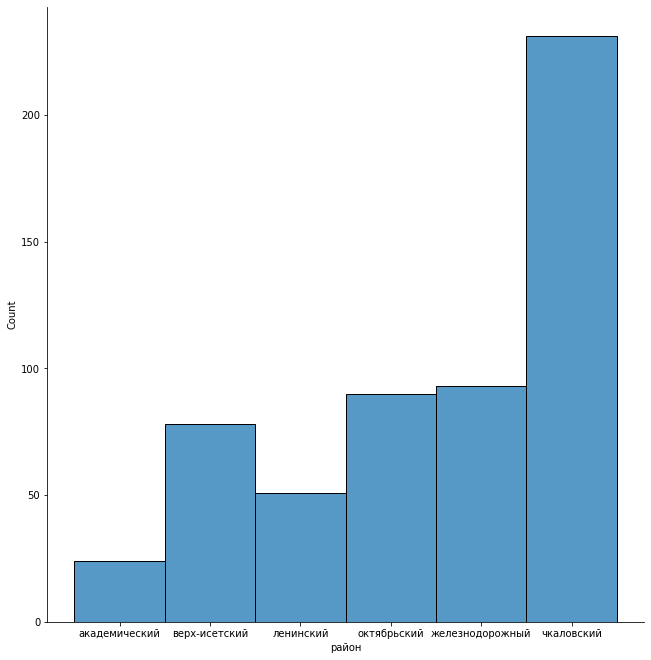

In [117]:
g = sns.displot(big_table['район'])
g.fig.set_size_inches(10,10)

Добавление премиальности в новую таблицу

In [118]:
big_table['категория'] = big_table['цена_квартиры'].apply(premium)
big_table

,количество_комнат,цена_квартиры,площадь,район,категория
0,1,2.85,27.10,академический,дешевая
1,1,2.95,27.10,академический,дешевая
2,1,3.20,30.80,академический,дешевая
3,1,3.35,35.45,академический,дешевая
4,1,3.46,34.95,академический,дешевая
...,...,...,...,...,...
562,3,10.00,108.76,ленинский,премиальная
563,3,10.30,108.10,ленинский,премиальная
564,3,10.50,108.28,ленинский,премиальная
565,4,10.60,114.30,ленинский,премиальная


Проверка баланса по премиальности

In [119]:
big_table['категория'].value_counts()

дешевая        405
средняя        102
премиальная     60
Name: категория, dtype: int64

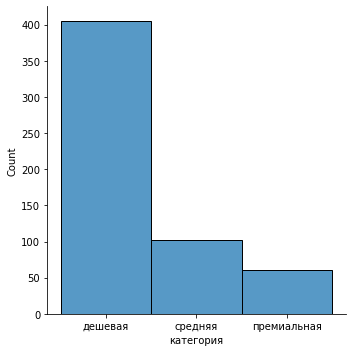

In [120]:
gr = sns.displot(big_table['категория'])
gr.fig.set_size_inches(5,5)

Объединение таблиц

In [121]:
third_table.dtypes

количество_комнат      int64
цена_квартиры        float64
площадь              float64
район                 object
категория             object
dtype: object

In [122]:
third_table['количество_комнат'].unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [123]:
big_table.dtypes

количество_комнат     object
цена_квартиры        float64
площадь              float64
район                 object
категория             object
dtype: object

In [124]:
big_table.loc[big_table['количество_комнат'] == 'Ст','количество_комнат'] = 0

In [125]:
list(big_table['количество_комнат'].unique())

['1', '2', '3', 0, '4']

In [126]:
big_table['количество_комнат'] = pd.to_numeric(big_table['количество_комнат'])
big_table.head(10)

,количество_комнат,цена_квартиры,площадь,район,категория
0,1,2.85,27.10,академический,дешевая
1,1,2.95,27.10,академический,дешевая
2,1,3.20,30.80,академический,дешевая
3,1,3.35,35.45,академический,дешевая
4,1,3.46,34.95,академический,дешевая
5,1,3.68,37.25,академический,дешевая
6,1,3.79,40.85,академический,дешевая
7,1,3.82,41.15,академический,дешевая
8,1,3.91,42.00,академический,дешевая
9,1,3.94,42.50,академический,дешевая


In [127]:
big_table.dtypes

количество_комнат      int64
цена_квартиры        float64
площадь              float64
район                 object
категория             object
dtype: object

In [128]:
imp_table = pd.concat([third_table, big_table], axis=0)
imp_table

,количество_комнат,цена_квартиры,площадь,район,категория
0,1,2.85,27.10,академический,дешевая
1,1,2.95,27.10,академический,дешевая
2,1,3.20,30.80,академический,дешевая
3,1,3.35,35.45,академический,дешевая
4,1,3.46,34.95,академический,дешевая
...,...,...,...,...,...
562,3,10.00,108.76,ленинский,премиальная
563,3,10.30,108.10,ленинский,премиальная
564,3,10.50,108.28,ленинский,премиальная
565,4,10.60,114.30,ленинский,премиальная


Проверка на пропуски в объединенной таблице

In [129]:
imp_table.isna().sum()

количество_комнат    0
цена_квартиры        0
площадь              0
район                0
категория            0
dtype: int64

Баланс до удаления дубликатов

In [130]:
imp_table['район'].value_counts()

чкаловский         315
верх-исетский      200
железнодорожный    143
октябрьский        140
ленинский           92
академический       52
Name: район, dtype: int64

In [131]:
imp_table['категория'].value_counts()

дешевая        627
средняя        188
премиальная    127
Name: категория, dtype: int64

Проверка на дубликаты в объединенной таблице

In [132]:
imp_table.duplicated().sum()

182

Удаление дубликатов

In [133]:
imp_table = imp_table.drop_duplicates().reset_index(drop=True)
imp_table.head(10)

,количество_комнат,цена_квартиры,площадь,район,категория
0,1,2.85,27.10,академический,дешевая
1,1,2.95,27.10,академический,дешевая
2,1,3.20,30.80,академический,дешевая
3,1,3.35,35.45,академический,дешевая
4,1,3.46,34.95,академический,дешевая
5,1,3.68,37.25,академический,дешевая
6,1,3.79,40.85,академический,дешевая
7,1,3.82,41.15,академический,дешевая
8,1,3.91,42.00,академический,дешевая
9,1,3.94,42.50,академический,дешевая


Проверка на наличие дисбаланса в общей таблице

In [134]:
imp_table['район'].value_counts()

чкаловский         245
железнодорожный    139
октябрьский        137
верх-исетский      122
ленинский           92
академический       25
Name: район, dtype: int64

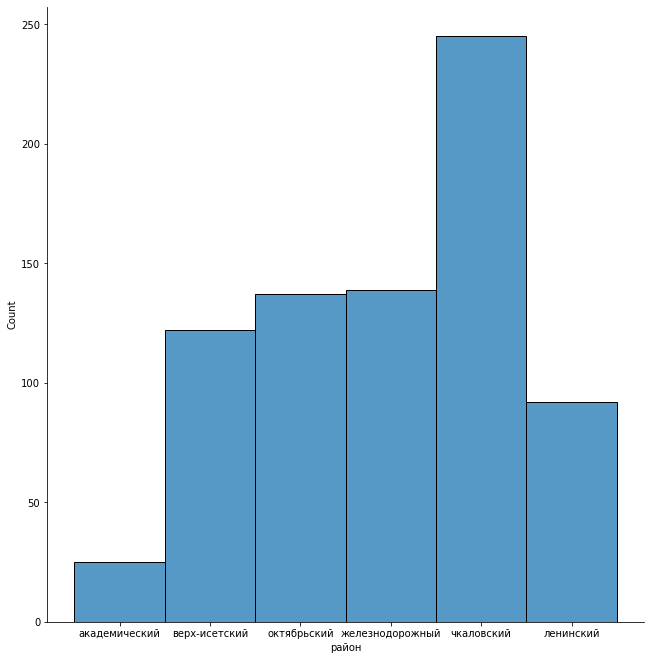

In [135]:
grf = sns.displot(imp_table['район'])
grf.fig.set_size_inches(10,10)

Проверка на баланс в категориях жилья

In [136]:
imp_table['категория'].value_counts()

дешевая        492
средняя        161
премиальная    107
Name: категория, dtype: int64

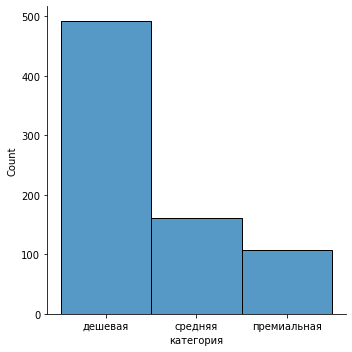

In [137]:
grp = sns.displot(imp_table['категория'])
grp.fig.set_size_inches(5,5)

In [138]:
imp_features = imp_table.drop('цена_квартиры', axis=1)
imp_target = imp_table['цена_квартиры']

Тестировиние на выборке с дисбалансом

Тест для CatBoostRegressor

In [139]:
imp_unbalanced_cat_mse = round(abs(cross_val_score(CatBoostRegressor(random_state=12345), imp_features, imp_target, cv=3, scoring=mse,
                          fit_params={'cat_features': ['район', 'категория']}).mean()), 2)
print('Показатель метрики mse для CatBoostRegressor в случае обновленной дисбалансной выборки',
      imp_unbalanced_cat_mse)

Learning rate set to 0.036765
0:	learn: 2.0973693	total: 82.8ms	remaining: 1m 22s
1:	learn: 2.0351393	total: 218ms	remaining: 1m 48s
2:	learn: 1.9773080	total: 291ms	remaining: 1m 36s
3:	learn: 1.9180244	total: 424ms	remaining: 1m 45s
4:	learn: 1.8609006	total: 522ms	remaining: 1m 43s
5:	learn: 1.8133376	total: 643ms	remaining: 1m 46s
6:	learn: 1.7620883	total: 789ms	remaining: 1m 51s
7:	learn: 1.7129851	total: 883ms	remaining: 1m 49s
8:	learn: 1.6656650	total: 973ms	remaining: 1m 47s
9:	learn: 1.6212791	total: 1.07s	remaining: 1m 46s
10:	learn: 1.5807776	total: 1.12s	remaining: 1m 40s
11:	learn: 1.5397745	total: 1.24s	remaining: 1m 42s
12:	learn: 1.4993846	total: 1.33s	remaining: 1m 41s
13:	learn: 1.4616130	total: 1.42s	remaining: 1m 40s
14:	learn: 1.4233414	total: 1.53s	remaining: 1m 40s
15:	learn: 1.3845082	total: 1.64s	remaining: 1m 40s
16:	learn: 1.3488367	total: 1.78s	remaining: 1m 42s
17:	learn: 1.3122181	total: 1.86s	remaining: 1m 41s
18:	learn: 1.2762117	total: 1.99s	remaining

In [140]:
imp_unbalanced_cat_mae = round(abs(cross_val_score(CatBoostRegressor(random_state=12345), imp_features, imp_target, cv=3, scoring=mae,
                                                   fit_params={'cat_features': ['район', 'категория']}).mean()), 2)
print('Показатель метрики mae для CatBoostRegressor в случае обновленной дисбалансной выборки',
      imp_unbalanced_cat_mae)

Learning rate set to 0.036765
0:	learn: 2.0973693	total: 81ms	remaining: 1m 20s
1:	learn: 2.0351393	total: 171ms	remaining: 1m 25s
2:	learn: 1.9773080	total: 240ms	remaining: 1m 19s
3:	learn: 1.9180244	total: 345ms	remaining: 1m 25s
4:	learn: 1.8609006	total: 482ms	remaining: 1m 35s
5:	learn: 1.8133376	total: 609ms	remaining: 1m 40s
6:	learn: 1.7620883	total: 757ms	remaining: 1m 47s
7:	learn: 1.7129851	total: 837ms	remaining: 1m 43s
8:	learn: 1.6656650	total: 917ms	remaining: 1m 40s
9:	learn: 1.6212791	total: 1.01s	remaining: 1m 39s
10:	learn: 1.5807776	total: 1.06s	remaining: 1m 35s
11:	learn: 1.5397745	total: 1.2s	remaining: 1m 38s
12:	learn: 1.4993846	total: 1.31s	remaining: 1m 39s
13:	learn: 1.4616130	total: 1.4s	remaining: 1m 38s
14:	learn: 1.4233414	total: 1.49s	remaining: 1m 37s
15:	learn: 1.3845082	total: 1.61s	remaining: 1m 39s
16:	learn: 1.3488367	total: 1.74s	remaining: 1m 40s
17:	learn: 1.3122181	total: 1.85s	remaining: 1m 41s
18:	learn: 1.2762117	total: 1.96s	remaining: 1m

Тест линейной регрессии на общей таблице

In [141]:
imp_dummies_features = pd.get_dummies(imp_features, drop_first=True)
imp_dummies_features

,количество_комнат,площадь,район_верх-исетский,район_железнодорожный,район_ленинский,район_октябрьский,район_чкаловский,категория_премиальная,категория_средняя
0,1,27.10,0,0,0,0,0,0,0
1,1,27.10,0,0,0,0,0,0,0
2,1,30.80,0,0,0,0,0,0,0
3,1,35.45,0,0,0,0,0,0,0
4,1,34.95,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
755,3,108.76,0,0,1,0,0,1,0
756,3,108.10,0,0,1,0,0,1,0
757,3,108.28,0,0,1,0,0,1,0
758,4,114.30,0,0,1,0,0,1,0


In [142]:
imp_unbalanced_regr_mse = round(abs(
    cross_val_score(LinearRegression(), imp_dummies_features, imp_target, cv=3, scoring=mse).mean()), 2)
print('Показатели mse для линейной регрессии в случае дисбаланса в общей выборке', imp_unbalanced_regr_mse)

Показатели mse для линейной регрессии в случае дисбаланса в общей выборке 2.3


In [143]:
imp_unbalanced_regr_mae = round(abs(
    cross_val_score(LinearRegression(), imp_dummies_features, imp_target, cv=3, scoring=mae).mean()), 2)
print('Показатели mae для линейной регрессии в случае дисбаланса в общей выборке', imp_unbalanced_regr_mae)

Показатели mae для линейной регрессии в случае дисбаланса в общей выборке 0.93


Показатели метрик по тесту с дисбалансом

In [144]:
d = {'model':['CatBoostRegressor','LinearRegression'],
     'mse':[imp_unbalanced_cat_mse, imp_unbalanced_regr_mse],
     'mae':[imp_unbalanced_cat_mae, imp_unbalanced_regr_mae]
     }
res = pd.DataFrame(data=d)
res

,model,mse,mae
0,CatBoostRegressor,0.41,0.38
1,LinearRegression,2.30,0.93


Тест модели CatBoostregressor на выборках по категории квартиры в общей выборке

In [145]:
premium_flats = imp_table.loc[imp_table['категория'] == 'премиальная']
medium_flats = imp_table.loc[imp_table['категория'] == 'средняя']
poor_flats = imp_table.loc[imp_table['категория'] == 'дешевая']

In [146]:
premium_features = premium_flats.drop('цена_квартиры', axis=1)
premium_target = premium_flats['цена_квартиры']

medium_features = medium_flats.drop('цена_квартиры', axis=1)
medium_target = medium_flats['цена_квартиры']

poor_features = poor_flats.drop('цена_квартиры', axis=1)
poor_target = poor_flats['цена_квартиры']

Выделение обучающей выборки

In [147]:
imp_features_train, imp_features_test, imp_target_train, imp_target_test = train_test_split(
    imp_features, imp_target, random_state=12345, test_size=0.25
)

In [148]:
imp_features

,количество_комнат,площадь,район,категория
0,1,27.10,академический,дешевая
1,1,27.10,академический,дешевая
2,1,30.80,академический,дешевая
3,1,35.45,академический,дешевая
4,1,34.95,академический,дешевая
...,...,...,...,...
755,3,108.76,ленинский,премиальная
756,3,108.10,ленинский,премиальная
757,3,108.28,ленинский,премиальная
758,4,114.30,ленинский,премиальная


Проверка наличия всех категорий в тестовой выборке

In [149]:
imp_features_train['категория'].value_counts()

дешевая        372
средняя        116
премиальная     82
Name: категория, dtype: int64

In [150]:
cat_model = CatBoostRegressor(random_state=42)
cat_model.fit(imp_features_train, imp_target_train, cat_features=['район', 'категория'])

Learning rate set to 0.037463
0:	learn: 2.2387937	total: 96.8ms	remaining: 1m 36s
1:	learn: 2.1784363	total: 195ms	remaining: 1m 37s
2:	learn: 2.1115818	total: 310ms	remaining: 1m 43s
3:	learn: 2.0457695	total: 444ms	remaining: 1m 50s
4:	learn: 1.9935696	total: 513ms	remaining: 1m 42s
5:	learn: 1.9346203	total: 619ms	remaining: 1m 42s
6:	learn: 1.8766456	total: 722ms	remaining: 1m 42s
7:	learn: 1.8222221	total: 830ms	remaining: 1m 42s
8:	learn: 1.7749554	total: 951ms	remaining: 1m 44s
9:	learn: 1.7382796	total: 993ms	remaining: 1m 38s
10:	learn: 1.6928909	total: 1.07s	remaining: 1m 36s
11:	learn: 1.6473284	total: 1.18s	remaining: 1m 37s
12:	learn: 1.6168686	total: 1.22s	remaining: 1m 32s
13:	learn: 1.5799961	total: 1.32s	remaining: 1m 32s
14:	learn: 1.5385144	total: 1.44s	remaining: 1m 34s
15:	learn: 1.4991771	total: 1.55s	remaining: 1m 35s
16:	learn: 1.4653779	total: 1.63s	remaining: 1m 34s
17:	learn: 1.4275708	total: 1.74s	remaining: 1m 34s
18:	learn: 1.3917437	total: 1.88s	remaining

Проверка техникой Bootstrap

Mse для дорогих квартир

In [151]:
premium_mse_part = partition(cat_model, premium_features, premium_target, mean_squared_error)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [152]:
premium_mse = bootstrap(premium_mse_part)
print('Средний показатель mse для дорогих квартир', round(premium_mse.mean(), 2))

  0%|          | 0/1000 [00:00<?, ?it/s]

Средний показатель mse для дорогих квартир 0.59


Mae для дорогих квартир

In [153]:
premium_mae_part = partition(cat_model, premium_features, premium_target, mean_absolute_error)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [154]:
premium_mae = bootstrap(premium_mae_part)
print('Средний показатель mae для дорогих квартир', round(premium_mae.mean(), 2))

  0%|          | 0/1000 [00:00<?, ?it/s]

Средний показатель mae для дорогих квартир 0.47


Mse для средних квартир

In [155]:
medium_mse_part = partition(cat_model, medium_features, medium_target, mean_squared_error)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [156]:
medium_mse = bootstrap(medium_mse_part)
print('Средний показатель mse для стандартных квартир', round(medium_mse.mean(), 2))

  0%|          | 0/1000 [00:00<?, ?it/s]

Средний показатель mse для стандартных квартир 0.13


Mae для средних квартир

In [157]:
medium_mae_part = partition(cat_model, medium_features, medium_target, mean_absolute_error)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [158]:
medium_mae = bootstrap(medium_mae_part)
print('Средний показатель mae для стандартных квартир', round(medium_mae.mean(), 2))

  0%|          | 0/1000 [00:00<?, ?it/s]

Средний показатель mae для стандартных квартир 0.27


Mse для дешевых квартир

In [159]:
poor_mse_part = partition(cat_model, poor_features, poor_target, mean_squared_error)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [160]:
poor_mse = bootstrap(poor_mse_part)
print('Средний показатель mse для дешевых квартир', round(poor_mse.mean(), 2))

  0%|          | 0/1000 [00:00<?, ?it/s]

Средний показатель mse для дешевых квартир 0.03


Mae для дешевых квартир

In [161]:
poor_mae_part = partition(cat_model, poor_features, poor_target, mean_absolute_error)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [162]:
poor_mae = bootstrap(poor_mae_part)
print('Средний показатель mae для дешевых квартир', round(poor_mae.mean(), 2))

  0%|          | 0/1000 [00:00<?, ?it/s]

Средний показатель mae для дешевых квартир 0.12


Построение распределения для метрики mse

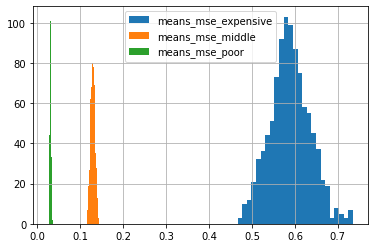

In [163]:
result_list_mse = [premium_mse, medium_mse, poor_mse]
result_list_mse_str = ['means_mse_expensive', 'means_mse_middle', 'means_mse_poor']
for i in [0, 1, 2]:
    result_list_mse[i].hist(bins=25)
plt.legend(result_list_mse_str)

Построение гистограммы для метрики mae

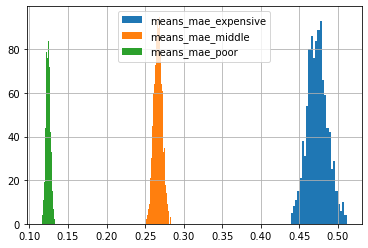

In [164]:
result_list_mae = [premium_mae, medium_mae, poor_mae]
result_list_mae_str = ['means_mae_expensive', 'means_mae_middle', 'means_mae_poor']
for i in [0, 1, 2]:
    result_list_mae[i].hist(bins=25)
plt.legend(result_list_mae_str)

Итоговая таблица с результатами 2 теста с Bootstrap

In [165]:
dat = {'балансировка':['unbalance', 'unbalance', 'unbalance'],
        'категория':['премиальные', 'средние', 'дешевые'],
       'mse':[round(premium_mse.mean(), 2), round(medium_mse.mean(), 2), round(poor_mse.mean(), 2)],
       'mae':[round(premium_mae.mean(), 2), round(medium_mae.mean(), 2), round(poor_mae.mean(), 2)]
       }
r = pd.DataFrame(data=dat)
r

,балансировка,категория,mse,mae
0,unbalance,премиальные,0.59,0.47
1,unbalance,средние,0.13,0.27
2,unbalance,дешевые,0.03,0.12


Тест с балансом

Приведение к балансу техникой downsampling

In [166]:
balance_table = imp_table.copy()
balance_table

,количество_комнат,цена_квартиры,площадь,район,категория
0,1,2.85,27.10,академический,дешевая
1,1,2.95,27.10,академический,дешевая
2,1,3.20,30.80,академический,дешевая
3,1,3.35,35.45,академический,дешевая
4,1,3.46,34.95,академический,дешевая
...,...,...,...,...,...
755,3,10.00,108.76,ленинский,премиальная
756,3,10.30,108.10,ленинский,премиальная
757,3,10.50,108.28,ленинский,премиальная
758,4,10.60,114.30,ленинский,премиальная


In [167]:
balance_table['категория'].value_counts()

дешевая        492
средняя        161
премиальная    107
Name: категория, dtype: int64

Уменьшим количество дешевых квартир до 160

In [168]:
for_indexation = balance_table.loc[balance_table['категория'] == 'дешевая'].head(492-160)
for_indexation

,количество_комнат,цена_квартиры,площадь,район,категория
0,1,2.85,27.10,академический,дешевая
1,1,2.95,27.10,академический,дешевая
2,1,3.20,30.80,академический,дешевая
3,1,3.35,35.45,академический,дешевая
4,1,3.46,34.95,академический,дешевая
...,...,...,...,...,...
567,0,2.56,23.70,чкаловский,дешевая
568,0,2.51,23.20,чкаловский,дешевая
569,0,2.84,26.50,чкаловский,дешевая
570,0,2.87,26.80,чкаловский,дешевая


In [169]:
balance_table = balance_table.drop(for_indexation.index, axis=0)
balance_table

,количество_комнат,цена_квартиры,площадь,район,категория
46,2,6.08,65.78,верх-исетский,средняя
47,2,6.42,63.56,верх-исетский,средняя
48,3,6.60,74.56,верх-исетский,средняя
49,3,6.74,71.37,верх-исетский,средняя
50,3,6.77,76.04,верх-исетский,средняя
...,...,...,...,...,...
755,3,10.00,108.76,ленинский,премиальная
756,3,10.30,108.10,ленинский,премиальная
757,3,10.50,108.28,ленинский,премиальная
758,4,10.60,114.30,ленинский,премиальная


In [170]:
balance_table = balance_table.reset_index(drop=True)
balance_table

,количество_комнат,цена_квартиры,площадь,район,категория
0,2,6.08,65.78,верх-исетский,средняя
1,2,6.42,63.56,верх-исетский,средняя
2,3,6.60,74.56,верх-исетский,средняя
3,3,6.74,71.37,верх-исетский,средняя
4,3,6.77,76.04,верх-исетский,средняя
...,...,...,...,...,...
423,3,10.00,108.76,ленинский,премиальная
424,3,10.30,108.10,ленинский,премиальная
425,3,10.50,108.28,ленинский,премиальная
426,4,10.60,114.30,ленинский,премиальная


Проверка баланса

In [171]:
balance_table['категория'].value_counts()

средняя        161
дешевая        160
премиальная    107
Name: категория, dtype: int64

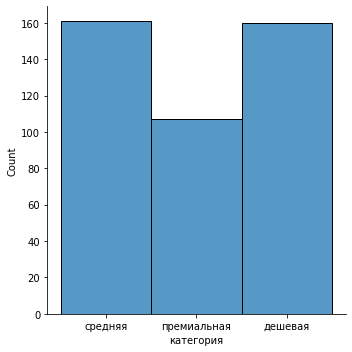

In [172]:
sns.displot(balance_table['категория'])

In [173]:
balance_features = balance_table.drop('цена_квартиры', axis=1)
balance_target = balance_table['цена_квартиры']

Тест модели CatBoostRegressor на выборке с балансом

In [174]:
balance_mse_cat = round(abs(cross_val_score(
    CatBoostRegressor(random_state=12345),
    balance_features, balance_target, cv=3, scoring=mse, fit_params={'cat_features':['район','категория']}).mean()), 2)
print('Показатели метрики mse на сбалансированной выборке', balance_mse_cat)

Learning rate set to 0.033577
0:	learn: 2.4636942	total: 81.8ms	remaining: 1m 21s
1:	learn: 2.3978101	total: 166ms	remaining: 1m 22s
2:	learn: 2.3377276	total: 315ms	remaining: 1m 44s
3:	learn: 2.2762914	total: 442ms	remaining: 1m 50s
4:	learn: 2.2251887	total: 481ms	remaining: 1m 35s
5:	learn: 2.1758230	total: 521ms	remaining: 1m 26s
6:	learn: 2.1214374	total: 624ms	remaining: 1m 28s
7:	learn: 2.0713658	total: 673ms	remaining: 1m 23s
8:	learn: 2.0252908	total: 771ms	remaining: 1m 24s
9:	learn: 1.9770326	total: 828ms	remaining: 1m 21s
10:	learn: 1.9346580	total: 948ms	remaining: 1m 25s
11:	learn: 1.8887861	total: 1.07s	remaining: 1m 27s
12:	learn: 1.8479435	total: 1.13s	remaining: 1m 26s
13:	learn: 1.8024795	total: 1.24s	remaining: 1m 27s
14:	learn: 1.7607791	total: 1.38s	remaining: 1m 30s
15:	learn: 1.7220222	total: 1.49s	remaining: 1m 31s
16:	learn: 1.6821117	total: 1.57s	remaining: 1m 30s
17:	learn: 1.6430199	total: 1.67s	remaining: 1m 30s
18:	learn: 1.6106474	total: 1.74s	remaining

In [ ]:
balance_mae_cat = round(abs(cross_val_score(
    CatBoostRegressor(random_state=12345),
    balance_features, balance_target, cv=3, scoring=mae, fit_params={'cat_features':['район','категория']}).mean()), 2)
print('Показатели метрики mse на сбалансированной выборке', balance_mae_cat)

Learning rate set to 0.033577
0:	learn: 2.4636942	total: 144ms	remaining: 2m 23s
1:	learn: 2.3978101	total: 306ms	remaining: 2m 32s
2:	learn: 2.3377276	total: 468ms	remaining: 2m 35s
3:	learn: 2.2762914	total: 709ms	remaining: 2m 56s
4:	learn: 2.2251887	total: 777ms	remaining: 2m 34s
5:	learn: 2.1758230	total: 859ms	remaining: 2m 22s
6:	learn: 2.1214374	total: 1.1s	remaining: 2m 36s
7:	learn: 2.0713658	total: 1.19s	remaining: 2m 27s
8:	learn: 2.0252908	total: 1.43s	remaining: 2m 37s
9:	learn: 1.9770326	total: 1.5s	remaining: 2m 28s
10:	learn: 1.9346580	total: 1.62s	remaining: 2m 26s
11:	learn: 1.8887861	total: 1.79s	remaining: 2m 27s
12:	learn: 1.8479435	total: 1.91s	remaining: 2m 25s
13:	learn: 1.8024795	total: 2.1s	remaining: 2m 28s
14:	learn: 1.7607791	total: 2.23s	remaining: 2m 26s
15:	learn: 1.7220222	total: 2.33s	remaining: 2m 23s
16:	learn: 1.6821117	total: 2.42s	remaining: 2m 20s
17:	learn: 1.6430199	total: 2.51s	remaining: 2m 16s
18:	learn: 1.6106474	total: 2.59s	remaining: 2m

In [ ]:
premium_flats_balance = balance_table.loc[balance_table['категория'] == 'премиальная']
medium_flats_balance = balance_table.loc[balance_table['категория'] == 'средняя']
poor_flats_balance = balance_table.loc[balance_table['категория'] == 'дешевая']

In [ ]:
premium_features_balance = premium_flats_balance.drop('цена_квартиры', axis=1)
premium_target_balance = premium_flats_balance['цена_квартиры']

medium_features_balance = medium_flats_balance.drop('цена_квартиры', axis=1)
medium_target_balance = medium_flats_balance['цена_квартиры']

poor_features_balance = poor_flats_balance.drop('цена_квартиры', axis=1)
poor_target_balance = poor_flats_balance['цена_квартиры']

Проверка модели CatBoostRegressor техникой Bootstrap на сбалансированной выборке

Выделелние обучающей выборки

In [ ]:
balance_features_train, balance_features_test, balance_target_train, balance_target_test = train_test_split(
    balance_features, balance_target, test_size=0.2, random_state=12345)

Обучение модели

In [ ]:
cat_balance = CatBoostRegressor(random_state=12345)
cat_balance.fit(balance_features_train, balance_target_train, cat_features=['район', 'категория'])

In [ ]:
premium_mse_balance_part = partition(cat_balance, premium_features_balance, premium_target_balance, mean_squared_error)
premium_mse_balance = bootstrap(premium_mse_balance_part)
print('Средний показатель mse для дорогих квартир', round(premium_mse_balance.mean(), 2))

In [ ]:
premium_mae_balance_part = partition(cat_balance, premium_features_balance, premium_target_balance, mean_absolute_error)
premium_mae_balance = bootstrap(premium_mae_balance_part)
print('Средний показатель mae для дорогих квартир', round(premium_mae_balance.mean(), 2))

In [ ]:
medium_mse_balance_part = partition(cat_balance, medium_features_balance, medium_target_balance, mean_squared_error)
medium_mse_balance = bootstrap(medium_mse_balance_part)
print('Средний показатель mse для стандартных квартир', round(medium_mse_balance.mean(), 2))

In [ ]:
medium_mae_balance_part = partition(cat_balance, medium_features_balance, medium_target_balance, mean_absolute_error)
medium_mae_balance = bootstrap(medium_mae_balance_part)
print('Средний показатель mae для стандартных квартир', round(medium_mae_balance.mean(), 2))

In [ ]:
poor_mse_balance_part = partition(cat_balance, poor_features_balance, poor_target_balance, mean_squared_error)
poor_mse_balance = bootstrap(poor_mse_balance_part)
print('Средний показатель mse для дешевых квартир', round(poor_mse_balance.mean(), 2))

In [ ]:
poor_mae_balance_part = partition(cat_balance, poor_features_balance, poor_target_balance, mean_absolute_error)
poor_mae_balance = bootstrap(poor_mae_balance_part)
print('Средний показатель mae для дешевых квартир', round(poor_mae_balance.mean(), 2))

Построение распределений

Сравнение распределений метрики mse

In [ ]:
result_list_mse = [premium_mse_balance, medium_mse_balance, poor_mse_balance]
result_list_mse_str = ['means_mse_expensive', 'means_mse_middle', 'means_mse_poor']
for i in [0, 1, 2]:
    result_list_mse[i].hist(bins=25)
plt.legend(result_list_mse_str)

In [ ]:
poor_mse_balance.hist(bins=25)

Сравнение распределения метрики mae

In [ ]:
result_list_mae = [premium_mae_balance, medium_mae_balance, poor_mae_balance]
result_list_mae_str = ['means_mae_expensive', 'means_mae_middle', 'means_mae_poor']
for i in [0, 1, 2]:
    result_list_mae[i].hist(bins=25)
plt.legend(result_list_mae_str)

Итоговая таблица

In [ ]:
dat = {'балансировка':['balance', 'balance', 'balance'],
        'категория':['премиальные', 'средние', 'дешевые'],
       'mse':[round(premium_mse_balance.mean(), 2), round(medium_mse_balance.mean(), 2), round(poor_mse_balance.mean(), 2)],
       'mae':[round(premium_mae_balance.mean(), 2), round(medium_mae_balance.mean(), 2), round(poor_mae_balance.mean(), 2)]
       }
r_final = pd.DataFrame(data=dat)
r_final

Объединение таблиц, с расчетом метрик по степени премиальности жилья

In [ ]:
final_bootstrap = pd.concat([r, r_final], axis=0)
final_bootstrap

In [ ]:
final_bootstrap.groupby(['категория', 'балансировка']).sum()

Таблица с показателями метрик, полученными кросс-валидацией, для CatBoostRegressor

In [ ]:
ry = {'балансировка':['unbalance', 'balance'],
      'mse':[imp_unbalanced_cat_mse, balance_mse_cat],
      'mae':[imp_unbalanced_cat_mae, balance_mae_cat]
      }
comparing_table = pd.DataFrame(data=ry)
comparing_table

Учитывая полученные результаты, можно сказать, что лучше всего для данной задачи подходит модель CatBoostRegressor обученная на полном несбалансированном наборе данных

Сохранение наилучшей модели в файл

In [ ]:
#import pickle
#with open('cat.pkl' , 'wb') as f:
    #pickle.dump(cat_model, f)